# Topic
* Stock Price Prediction 

### Focus
* S&P 500 - Accenture as Case Study.


## Theme
* Time-series analysis (tsa)

# Introduction

This project will be in two parts. The first would be an exploratory analysis of the S&P 500, focusing on the Information Technology sector. In this part, I will analyze the data to know the number of companies in each sector, know the oldest and youngest company in the index and most popular headquarter locations. I will also download the stock data from yahoo finance in this part, and then write a function to visualize by company ticker.

In the second part, I will build a model to predict the stock closing prices, in this part, I will use Accenture as the case study. This part will include feature engineering, data preparation, model development (ARIMA), prediction and evaluation. 

I will end the project by outlining some insights and observations from both parts of the project.


# Procedures

Part 1. General Analysis of S&P stock data

* Import modules, Scrape and Import data.
* Review & Clean data
* Exploratory Data analysis
* Download stock price [Source: Yahoo Finance]
    * Case: Accenture

Part 2. ARIMA MODEL development & evaluation

## 1. Import Modules, Scrape & Import Data

In [167]:
# Import relevant modules for the analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Here, I scrape the data from wikipedia and pass intona variable

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
html = pd.read_html(url, header = 0)
df = html[0]

In [3]:
# Quick preview of the data

df.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949



## 2. Review Data Properties & Clean Data


In [4]:
# Drop column that is not relevant to the analysis

df.drop('SEC filings', axis=1, inplace=True)

In [5]:
# Preview new dataframe

df.head(2)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916


In [6]:
# Check how many rows of data

len(df)

504

In [7]:
df.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date first added', 'CIK', 'Founded'],
      dtype='object')

In [8]:
df.dtypes

Symbol                   object
Security                 object
GICS Sector              object
GICS Sub-Industry        object
Headquarters Location    object
Date first added         object
CIK                       int64
Founded                  object
dtype: object

In [9]:
df.isna().values.any()

True

In [10]:
df.dropna(how='any', inplace=True)

In [11]:
df.isna().values.any()

False

In [12]:
df.duplicated().values.any()

False

## 3. Exploratory Data Analysis.

In this part, I answer a few questions as follow.


In [13]:
# What are the sectors within the S&P?

df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [14]:
# How many sectors are there in the S&P?

sector_count = df['GICS Sector'].unique()
len(sector_count)

11

In [15]:
# How many sub-sectors are there in total?

sub_industry_count = df['GICS Sub-Industry'].unique()
len(sub_industry_count)

121

In [16]:
# Find the oldest company in the S&P

df[df['Founded'] == (df['Founded'].min())]['Security']

70    BNY Mellon
Name: Security, dtype: object

In [17]:
# Find the youngest company in the S&P

df[df['Founded'] == (df['Founded'].max())]['Security']

483    Warner Bros. Discovery
Name: Security, dtype: object

In [246]:
# What are the most popular headquarters locations?

hq_locations_count = df.groupby('Headquarters Location')['Headquarters Location'].count().sort_values(ascending=False)
hq_locations_count.head(10)

Headquarters Location
New York City, New York      35
Houston, Texas               17
Chicago, Illinois            13
Atlanta, Georgia             12
Dallas, Texas                 8
San Jose, California          8
Charlotte, North Carolina     8
Santa Clara, California       7
Dublin, Ireland               6
Seattle, Washington           6
Name: Headquarters Location, dtype: int64

In [18]:
# Group data by sector & return top 10 on the list

sector = df.groupby('GICS Sector')
sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,ATVI,Activision Blizzard,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,ADM,ADM,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [19]:
# Descriptive analysis of the data by sector

sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  24.0  1.150723e+06  489997.992794  18926.0  851506.50   
Consumer Discretionary  56.0  8.703307e+05  462451.900257  27419.0  759791.50   
Consumer Staples        32.0  3.872794e+05  564407.571740   7084.0   24213.00   
Energy                  20.0  7.540602e+05  631982.654770   4447.0   91894.25   
Financials              54.0  6.929291e+05  535740.637556   4962.0   82073.75   
Health Care             61.0  8.383631e+05  530809.104454   1800.0  318154.00   
Industrials             68.0  6.711383e+05  586893.901661   4281.0   77103.50   
Information Technology  67.0  9.867065e+05  481212.857060   4127.0  797348.50   
Materials               26.0  8.026645e+05  703303.162426   2969.0   56902.75   
Real Estate             29.0  9.232999e+05  290631.676096  34903.0  879101.00   
Utilities               22.0  8.063869e+05  528892.748396   4904.0  447356.25   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   918562.5  1171238.00  1590895.0  
Consumer Staples          70615.0   789573.00  1679273.0  
Energy                   839829.5  1248950.50  1701605.0  
Financials               825514.0  1136575.25  1601712.0  
Health Care              879169.0  1100682.00  1821825.0  
Industrials              737525.0  1073457.50  1783180.0  
Information Technology  1043604.0  1378513.50  1730168.0  
Materials                915994.5  1378107.75  1755672.0  
Real Estate              920522.0  1053507.00  1393311.0  
Utilities                819104.0  1085485.50  1868275.0

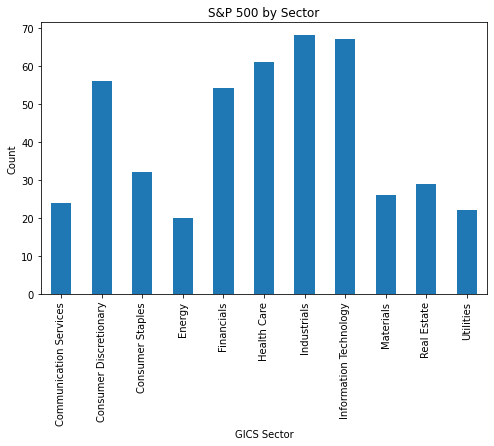

In [20]:
# A bar chart to visualize the number of companies in each sector

fig, ax = plt.subplots(figsize=(8,5))
sector.count()['Symbol'].plot.bar()
ax.set_title('S&P 500 by Sector')
ax.set_xlabel('GICS Sector')
ax.set_ylabel('Count')
plt.show()


In [21]:
# Slice data to preview only IT companies

sector.get_group('Information Technology')

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
5,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
8,ADBE,Adobe,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949
16,AKAM,Akamai,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998
40,APH,Amphenol,Information Technology,Electronic Components,"Wallingford, Connecticut",2008-09-30,820313,1932
...,...,...,...,...,...,...,...,...
456,TYL,Tyler Technologies,Information Technology,Application Software,"Plano, Texas",2020-06-22,860731,1966
471,VRSN,Verisign,Information Technology,Internet Services & Infrastructure,"Dulles, Virginia",2006-02-01,1014473,1995
477,V,Visa,Information Technology,Data Processing & Outsourced Services,"San Francisco, California",2009-12-21,1403161,1958
490,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,106040,1970


In [22]:
# Pass the sliced data into a new variable for easy analysis

df2 = sector.get_group('Information Technology')
df2.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
5,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
8,ADBE,Adobe,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949
16,AKAM,Akamai,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998
40,APH,Amphenol,Information Technology,Electronic Components,"Wallingford, Connecticut",2008-09-30,820313,1932


In [23]:
# Create a list of the symbols of each company 

list(sector.get_group('Information Technology')['Symbol'])

['ACN',
 'ADBE',
 'ADP',
 'AKAM',
 'APH',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ANET',
 'ADSK',
 'AVGO',
 'BR',
 'CDNS',
 'CDW',
 'CDAY',
 'CSCO',
 'CTXS',
 'CTSH',
 'DXC',
 'ENPH',
 'EPAM',
 'FFIV',
 'FIS',
 'FISV',
 'FLT',
 'FTNT',
 'IT',
 'GPN',
 'HPE',
 'HPQ',
 'INTC',
 'IBM',
 'INTU',
 'IPGP',
 'JKHY',
 'JNPR',
 'KEYS',
 'LRCX',
 'MA',
 'MCHP',
 'MU',
 'MSFT',
 'MPWR',
 'NTAP',
 'NLOK',
 'NVDA',
 'NXPI',
 'ORCL',
 'PAYC',
 'PYPL',
 'PTC',
 'QRVO',
 'CRM',
 'STX',
 'NOW',
 'SWKS',
 'SEDG',
 'SNPS',
 'TEL',
 'TER',
 'TRMB',
 'TYL',
 'VRSN',
 'V',
 'WDC',
 'ZBRA']

## 4.  Download stock price data from Yahoo Finance

In [24]:
# This code downloads the stock prices from yahoo finance & matches to symbol/tickers of S&P companies

data = yf.download(
    tickers=list(df2['Symbol']),
period = 'ytd',
interval = '1d',
group_by = 'ticker',
auto_adjust = True,
prepost = True,
threads = True,
proxy = None)



[*********************100%***********************]  67 of 67 completed


#### We have a total of 74 companies, and I downloaded of the stock prices is completed above.

In [25]:
# Preview the stock prices data. The data is grouped by the symbol of each company

data.head(10)

INTU                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2022-01-03  638.409664  643.975493  619.707133  629.871277  1360600   
2022-01-04  629.871311  629.871311  604.595497  616.754639  1998900   
2022-01-05  607.887055  613.133748  591.668212  592.196899  2295800   
2022-01-06  585.314392  594.341468  578.741110  584.905457  1789000   
2022-01-07  585.634404  588.180889  562.995563  566.780334  2275200   
2022-01-10  552.759655  570.105789  543.112890  569.406738  2956700   
2022-01-11  565.422228  578.813780  557.752785  577.924988  1696500   
2022-01-12  584.006658  588.760129  575.009025  576.467041  1433700   
2022-01-13  580.092072  581.729834  550.942167  552.160461  1633400   
2022-01-14  550.572622  556.574376  542.653524  550.033325  1722600   

                  MSFT                                                ...  \
                  Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2022-01-03  334.658033  337.302559  329.099519  334.059265  28865100  ...   
2022-01-04  334.139083  334.508345  325.447064  328.331116  32674300  ...   
2022-01-05  325.187592  325.397181  315.328004  315.727173  40054300  ...   
2022-01-06  312.503826  318.042392  310.847247  313.232330  39646100  ...   
2022-01-07  313.501757  315.846914  309.450137  313.391998  32720000  ...   
2022-01-10  308.851385  314.070605  304.061302  313.621521  44289500  ...   
2022-01-11  312.733373  315.956689  309.250585  314.330078  29386800  ...   
2022-01-12  319.010386  322.742659  316.425704  317.613251  34372200  ...   
2022-01-13  319.808730  320.217888  303.372714  304.171051  45366000  ...   
2022-01-14  303.622202  310.178652  303.123233  309.559937  39846400  ...   

                 ORCL                                                   AAPL  \
                 Open       High        Low      Close    Volume        Open   
Date                                                                           
2022-01-03  86.667737  87.273111  85.109643  87.233414  10644400  177.343154   
2022-01-04  87.233416  88.900676  87.064707  88.166283  11959000  182.130025   
2022-01-05  87.818941  87.928107  85.566159  85.804337  11236700  179.118295   
2022-01-06  85.664884  87.079349  85.216640  86.003555   7918400  172.227194   
2022-01-07  86.113124  87.657087  85.943788  87.168999   9836800  172.416684   
2022-01-10  87.039501  89.031707  86.611176  88.932098  11025500  168.617111   
2022-01-11  88.294596  88.653194  87.069393  88.135223   7249800  171.848239   
2022-01-12  88.543623  89.171165  87.328376  87.965881   5840300  175.637835   
2022-01-13  88.384246  88.573500  87.208844  87.447906   6044300  175.298765   
2022-01-14  87.139116  87.756696  86.322312  87.348297   6054800  170.870932   

                                                           
                  High         Low       Close     Volume  
Date                                                       
2022-01-03  182.379332  177.223488  181.511703  104487900  
2022-01-04  182.439174  178.629624  179.208038   99310400  
2022-01-05  179.676759  174.161899  174.441132   94537600  
2022-01-06  174.820082  171.170099  171.529114   96904000  
2022-01-07  173.663262  170.561776  171.698654   86709100  
2022-01-10  172.027746  167.709599  171.718597  106765600  
2022-01-11  174.700395  170.352346  174.600677   76138300  
2022-01-12  176.694930  174.341406  175.049454   74805200  
2022-01-13  176.136462  171.319683  171.718597   84505800  
2022-01-14  173.304254  170.621616  172.596207   80440800  

[10 rows x 335 columns]

In [26]:
# I slice the data by sticker to view accenture stock price 

data['ACN'].sort_values(by='Date', ascending=False)

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-13,283.040009,288.670013,280.989990,286.769989,2373600
2022-05-12,278.000000,281.660004,274.790009,281.209991,2284600
2022-05-11,285.730011,288.489990,280.459991,280.940002,2398600
2022-05-10,290.000000,292.399994,283.750000,287.589996,2634600
2022-05-09,290.660004,292.489990,285.859985,287.489990,2584100
...,...,...,...,...,...
2022-01-07,376.987185,377.882187,368.086849,368.693451,3469000
2022-01-06,382.556122,390.024473,373.675664,375.903229,4386600
2022-01-05,401.689395,401.729182,394.897294,394.976837,2471400


### Case: Accenture

In [27]:
# This code pull the closing prices of accenture shares & passes into a new variable for analysis.

data2 = pd.DataFrame(data['ACN']['Close'])
data2['Date'] = data.index
data2.head()


,Close,Date
Date,,
2022-01-03,404.951202,2022-01-03
2022-01-04,402.057343,2022-01-04
2022-01-05,394.976837,2022-01-05
2022-01-06,375.903229,2022-01-06
2022-01-07,368.693451,2022-01-07


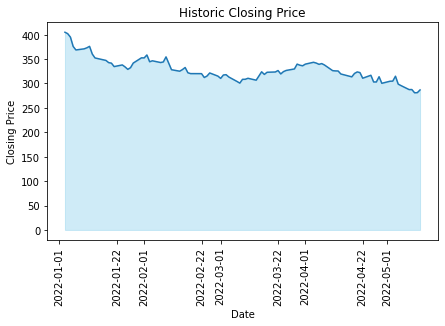

In [28]:
# Review accenture stock performance

fig, ax = plt.subplots(figsize=(7,4))
plt.plot(data2['Date'], data2['Close'])
plt.xticks(rotation = 90)
ax.set_title('Historic Closing Price')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.fill_between(data2['Date'],data2['Close'],color='skyblue', alpha=0.4)
plt.show()

In [29]:
# A helper function to generate stock price charts when we call the company symbol

def plot_historic_price(symbol):
    fig, ax = plt.subplots()
    data3 = pd.DataFrame(data[symbol].Close)
    data3['Date'] = data.index
    plt.fill_between(data3['Date'],data3['Close'],color='skyblue', alpha=0.4)
    plt.plot(data3['Date'], data3['Close'], color='Skyblue', alpha=0.4)
    plt.xticks(rotation = 90)
    ax.set_title(symbol, fontweight ='bold')
    ax.set_xlabel('Date', fontweight ='bold')
    ax.set_ylabel('Closing Price', fontweight='bold')
    return plt.show()

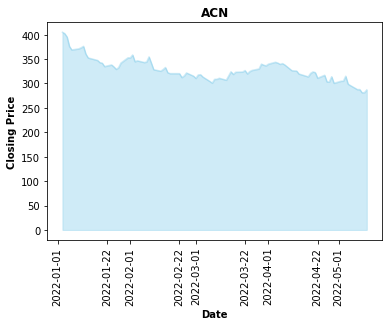

In [30]:
# Here, I plot the share price of Accenture

plot_historic_price('ACN')

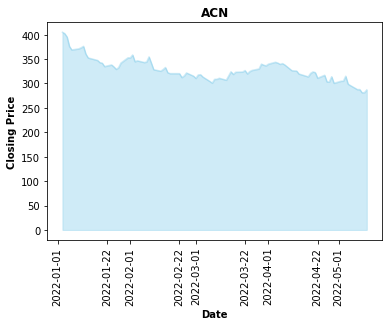

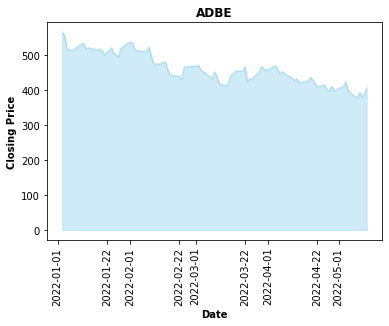

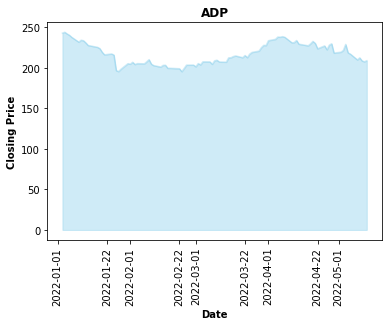

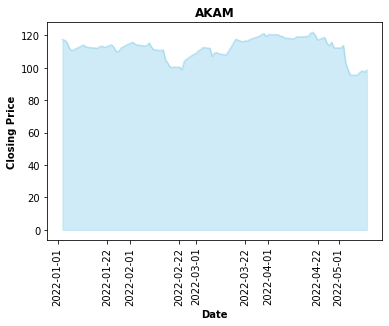

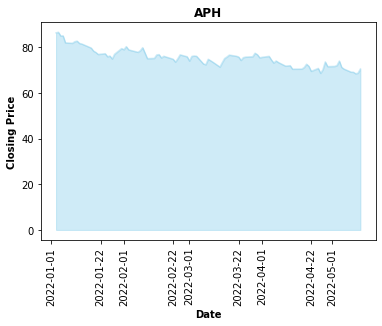

In [31]:
# Using the helper function, we can look up specific stocks or a selection based on slice, as below

for company in list(df2['Symbol'])[:5]:
    plot_historic_price(company)


# Part 2. Stock Price Prediction, Using ARIMA Model

## ARIMA MODEL

ARIMA is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is said to be autoregressive if it predicts future values based on past values. The ARIMA models combines both autoregressive and moving average approaches. 

The ARIMA model will be implemented in Python, as follows;

* Visualize the data.
* Convert the time series data to a stationary form.
* Plot the ACF and PACF plots.
* Build the ARIMA model.
* Make the predictions using the ARIMA model built




In [32]:
# Here, I import the relevant models

from sklearn.model_selection import train_test_split
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from numpy import log

### 1. Let's analyze the data through various visualization plots

In [33]:
# Let's make the data pneumonic

acn_data = data2.copy()
acn_data.head(2)

,Close,Date
Date,,
2022-01-03,404.951202,2022-01-03
2022-01-04,402.057343,2022-01-04


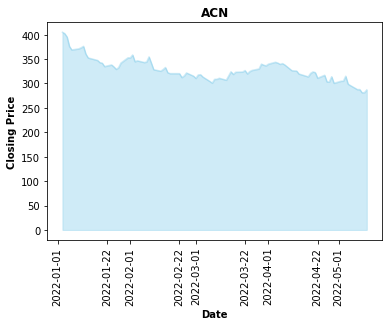

In [34]:
# Call the helper function to visualize the stock price

plot_historic_price('ACN')


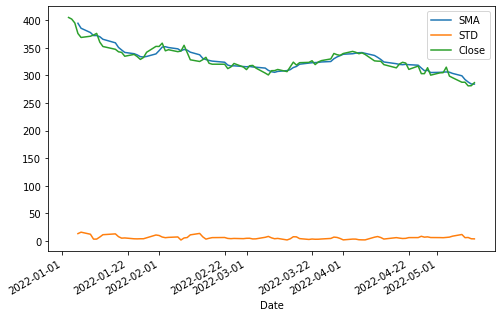

In [35]:
# Let's compare 4-month simple moving average along with the series to ascertain trend. 
# The standard deviation is also plotted to see if there is any variance.


acn_data['Close'].rolling(4).mean().plot(label='SMA',figsize=(8,5))
acn_data['Close'].rolling(4).std().plot(label='STD')
acn_data['Close'].plot()
plt.legend()
plt.show()

As seen from above, the standard deviation is not varying much, hence variance is not much.

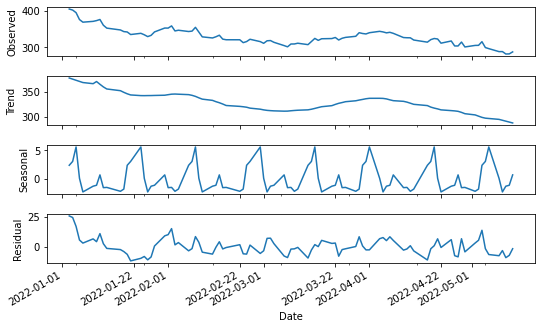

In [36]:
# Next, we decompose the time series data to its trend, seasonality & residual components.

from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(acn_data['Close'], model='additive',freq=12, extrapolate_trend = 12)
fig = decomp.plot()
fig.set_size_inches(8,5)


### 2. Convert time-series data to stationary form

We will use the Dickey Fuller & KPSS methods. Both tests are recommended to ascertain stationarity of data. 

According to Dickey-Fuller; 

* The null hypothesis states a unit root is present and it is a non-stationary time series. 
* The alternative hypothesis is that there is no unit root and the series is stationary.
* Using parameter ‘p’. If p is p<=0.05, we reject the null hypothesis, otherwise we accept the hypothesis.

According to KPSS Test;

* Null Hypothesis states that process is trend stationary.
* Alternate Hypothesis states that series has a unit root and series is not stationary.


#### How the results is to be interpreted

* Case 1 - Both tests conclude that the series is not stationary - The series is not stationary
* Case 2 - Both tests conclude that the series is stationary - The series is stationary
* Case 3 - KPSS indicates stationarity & ADF indicates non-stationarity - Series is trend stationary. Trend will be removed to make series strict stationary. 
* Case 4 - KPSS indicates non-stationarity and ADF indicates stationarity - Series is difference stationary. Differencing is to be used to make series stationary. 

In [37]:
from statsmodels.tsa.stattools import adfuller
fuller_test = adfuller(acn_data['Close'])
fuller_test

(-2.730888334362359,
 0.06884404812858048,
 0,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 524.9718069968949)

In [38]:
# Next, I will create a helper function to conduct ADF Test

def display_p_value(data):
    fuller_test = adfuller(data)
    print('P-Value: ', fuller_test[1])
    if fuller_test[1] <= 0.05:
        print('Data is stationary, therefore reject null hypothesis')
    else:
        print('Data is not stationary, do not reject null hypothesis')
        

# Let's call the function on our data

display_p_value(acn_data['Close'])
 

P-Value:  0.06884404812858048
Data is not stationary, do not reject null hypothesis


In [39]:
# Next, we will create a helper function to conduct KPSS Test

from statsmodels.tsa.stattools import kpss

def kpss_test_result(timeseriesdata):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseriesdata, regression="c", lags='legacy')
    kpss_output = pd.Series(kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
    
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


# Let's call the function on our data

kpss_test_result(acn_data['Close'])

Results of KPSS Test:
Test Statistic            0.605984
p-value                   0.022092
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


KPSS test results stationary data as p-value is < 0.05

#### Result Summary : We have a situation of case 4. Hence, I will implement differencing.

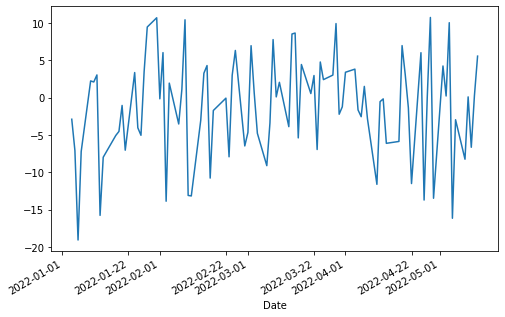

In [40]:
# First differencing

fig, ax = plt.subplots(figsize=(8,5))
acn_data['first_differencing'] = acn_data['Close'] - acn_data['Close'].shift(1)
acn_data['first_differencing'].plot()
plt.show()


In [41]:
# I call the ADF helper function to check stationarity after first differecing.

display_p_value(acn_data['first_differencing'].dropna())

P-Value:  2.2089606460270262e-16
Data is stationary, therefore reject null hypothesis


In [168]:
# I call the KPSS helper function to check stationarity after first differecing.

kpss_test_result(acn_data['first_differencing'].dropna())

Results of KPSS Test:
Test Statistic            0.19272
p-value                   0.10000
Lags Used                12.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


Data is now stationary judging from both ADF & KPSS test conducted.

### 3. Plot ACF and PACF

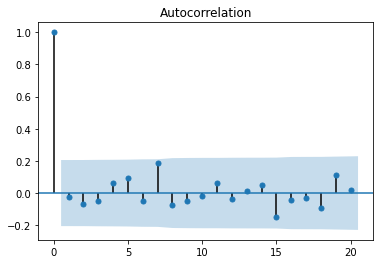

In [43]:
# We only differenced once to get to this, so, d=1 in ARIMA model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
first_differencing = plot_acf(acn_data['first_differencing'].dropna())


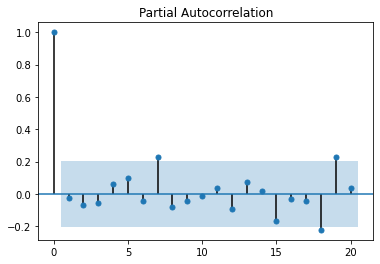

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf_first_differencing = plot_pacf(acn_data['first_differencing'].dropna())

As observed above, the first differencing was enough to make the data stationary.


### 4. Build & Fit the ARIMA Model

In [169]:
# Let's fit the ARIMA model

from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(acn_data['Close'], order=(1,1,0))
model = arima_model.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   91
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -303.365
Method:                       css-mle   S.D. of innovations              6.785
Date:                Mon, 16 May 2022   AIC                            612.729
Time:                        09:47:12   BIC                            620.262
Sample:                             1   HQIC                           615.768
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3002      0.694     -1.875      0.064      -2.660       0.059
ar.L1.D.Close    -0.0259      0.105     -0.247      0.806      -0.231       0.180
                                    Root

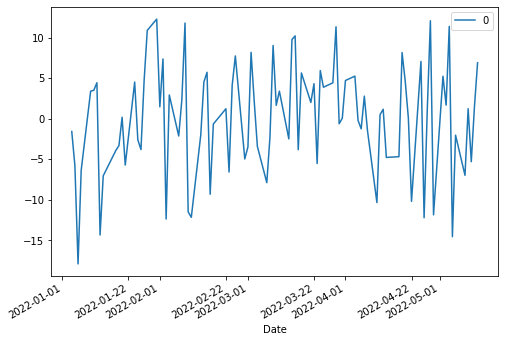

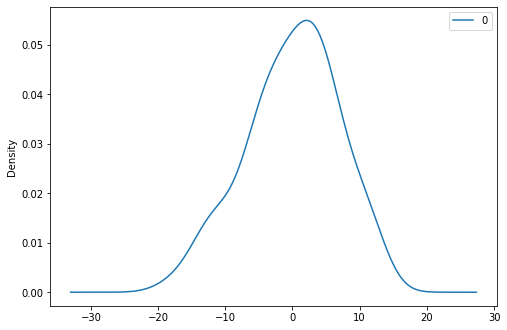

               0
count  91.000000
mean   -0.000452
std     6.822734
min   -17.922900
25%    -4.316036
50%     0.979051
75%     4.569694
max    12.276514


In [47]:

plt.rcParams["figure.figsize"] = (8,5.5)


# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

The distribution of the errors can be seen by plotting the KDE. And as seen from above plot, the errors are mostly distributed around 0, but there is slight bias.


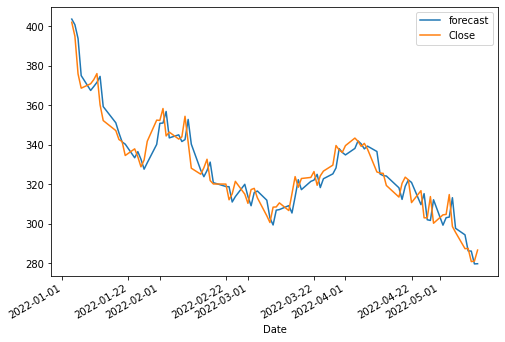

In [163]:
# After model fitting, now to predict

model.plot_predict(dynamic=False)
plt.show()

## Closing Notes

* Ideally, although I have used the entire dataset in this analysis, ideally I would split into train and test.
* Data was not stationary (a requirement to develop an ARIMA model), using differencing, I got the data stationary.
* Using both ADF and KPSS test was necessary to be totally sure the data was stationary.
* As seen above, the modern performs pretty well in predicting the stock closing price.
